In [2]:
import pandas as pd
import matplotlib.pyplot as plt

The process of getting to Ns and replicates is more involved than I thought. I have located the appropriate files by taking way to long to scroll through /data/longterm and by athira pointing me in the right direction. I have the file with all the experiments here:

In [84]:
import os

In [85]:
if not os.path.exists("age_hists"):
    os.mkdir("age_hists")

In [74]:
combined_df = pd.read_pickle('/share/devops/athira/paleontology/notebooks/tox_tierpsy_combined_metadata.pickle')
combined_df["to_match"] = combined_df["renamed_tierpsy_filename"].dropna().str.split("_").apply(lambda x: "_".join(x[:7]))

Then I have a file that maps back data between toxtrac and tierpsy with all the renames and things that have happend. Thanks again Athira. :)

In [4]:
meta = pd.read_pickle('/data/longterm/10/athira/paper_tierpsy_behavior_v0/metadata/20210209_metadata_1743_of_4086_exps.pickle')

Now I can grab all the contol files from the metadatafile, and strip it back down to original filenames:

In [6]:
controls = meta[meta["good_694"] == True].filename.str.split("_").apply(lambda x: "_".join(x[:7]))


In [8]:
controls

0        20180919_115015_1_5m0s_None_None_None
1        20180906_192607_1_5m0s_None_None_None
3       20180823_155207_1_15m0s_None_None_None
8        20180709_104455_1_5m0s_None_None_None
11       20180806_135537_1_5m0s_None_None_None
                         ...                  
4032    20180919_130548_1_15m0s_None_None_None
4039     20180713_121840_1_5m0s_None_None_None
4042     20180725_120826_1_5m0s_None_None_None
4063    20180705_114517_1_15m0s_None_None_None
4077     20180914_124343_1_5m0s_None_None_None
Name: filename, Length: 694, dtype: object

Now I need one more file: the overarching file of all toxtrac data for this project.

In [10]:
tox = pd.read_pickle("/data/longterm/2/Jerneja_Behaviour/COMBINED_BehaviourDataSet_2018/dataframes/common_data.pickle")

Now this file doenst have filenames as easily accesible entries, so we have to do some magic there as well to get things into a realm where I can do string matching.

In [16]:
tox["filename"] = tox["dataframepath"].str.split("/").apply(lambda x: x[7]).apply(lambda x: x.lstrip("Exp_"))

In [17]:
tox["filename"]

0                  20180813_080353_1_5m0s_None_None_None
1         20180808_133433_1_15m0s_phentolamine_None_None
2          20180718_104634_1_5m0s_imipramine10_None_None
3          20180807_192540_1_5m0s_phentolamine_None_None
4       20180706_100913_1_5m0s_chlopromazine01_None_None
                              ...                       
5162       20180717_141815_1_5m0s_serotonin100_None_None
5163     20180622_165851_1_5m0s_raclopride0025_None_None
5164     20180803_131932_1_15m0s_octopamine100_None_None
5165              20181211_154221_1_5m0s_None_None_Light
5166       20180716_115725_1_5m0s_serotonin100_None_None
Name: filename, Length: 5167, dtype: object

Now I can create a histogram of the ages of all control files taken from the first file as found in the last! 

In [19]:
controls_in_all = tox[tox["filename"].isin(controls)]

In [115]:
len(controls_in_all["date"].unique())

25

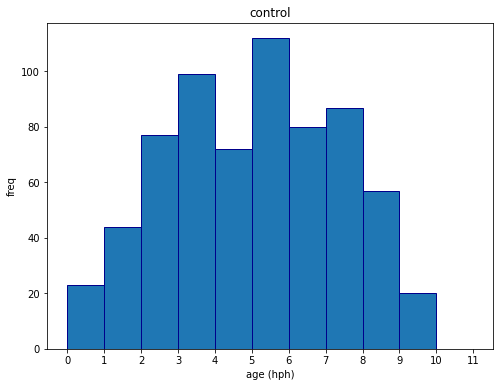

In [97]:
fig, ax = plt.subplots(figsize = (8,6))
hist = ax.hist(controls_in_all["age"], bins = range(12), edgecolor = "darkblue")
ax.set_title("control")
ax.set_ylabel("freq")
ax.set_xlabel("age (hph)")
ax.set_xticks(range(12))
ax.set_xticklabels(range(12))

fig.savefig("./age_hists/control.svg")

Now for all the drugs, which will be a bit more involved. Lets get them out of the over

In [69]:
drug_files = meta[meta["drugs_899"] == True]

In [71]:
drug_files["filename_tox"] = drug_files.filename.str.split("_").apply(lambda x: "_".join(x[:7]))

In [72]:
drug_files

,filename,quality,n_frames,date_time,duration,arena,drug,genetic,light,inverted,filepath,swims_151,good_694,drugs_899,light_150,filename_tox
13,20180709_081052_1_5m0s_Chlorpromazine_None_Non...,96.378180,9001,20180709_081052,5m0s,1,Chlorpromazine,None,None,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180709_081052_1_5m0s_Chlorpromazine_None_None
19,20180713_103723_1_5m0s_Methiothepin_None_None_...,99.705954,8162,20180713_103723,5m0s,1,Methiothepin,None,None,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180713_103723_1_5m0s_Methiothepin_None_None
20,20180713_084549_1_5m0s_Methiothepin_None_None_...,89.461467,8616,20180713_084549,5m0s,1,Methiothepin,None,None,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180713_084549_1_5m0s_Methiothepin_None_None
24,20180808_124808_1_5m0s_Dopamine_None_None_skel...,99.355699,9002,20180808_124808,5m0s,1,Dopamine,None,None,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180808_124808_1_5m0s_Dopamine_None_None
32,20180730_164700_1_5m0s_Octopamine_None_None_sk...,88.082423,6503,20180730_164700,5m0s,1,Octopamine,None,None,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180730_164700_1_5m0s_Octopamine_None_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,20180716_082540_1_5m0s_Serotonin_None_None_INV...,100.000000,9001,20180716_082540,5m0s,1,Serotonin,None,None,True,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180716_082540_1_5m0s_Serotonin_None_None
4073,20180713_114844_1_5m0s_Methiothepin_None_None_...,100.000000,8568,20180713_114844,5m0s,1,Methiothepin,None,None,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180713_114844_1_5m0s_Methiothepin_None_None
4075,20180926_134409_1_5m0s_AA_None_None_INVERTED_s...,99.931733,8789,20180926_134409,5m0s,1,AA,None,None,True,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180926_134409_1_5m0s_AA_None_None
4081,20180808_112130_1_5m0s_Dopamine_None_None_skel...,99.822242,9001,20180808_112130,5m0s,1,Dopamine,None,None,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,True,False,20180808_112130_1_5m0s_Dopamine_None_None


In [111]:
for drug in drug_files["drug"].unique():
    subset = drug_files[drug_files["drug"] == drug]
    toxfilenames = combined_df["toxtrac_fname"][combined_df["to_match"].isin(subset["filename_tox"])]
#     ages = tox["age"][tox["filename"].isin(toxfilenames)]   
#     fig, ax = plt.subplots(figsize = (8,6))
#     ax.set_ylabel("freq")
#     ax.set_xlabel("age (hph)")
#     ax.set_xticks(range(12))
#     ax.set_xticklabels(range(12))
#     ax.hist(ages, bins = range(12), edgecolor = "darkblue")
    
#     ax.set_title(drug)
#     fig.savefig(f"./age_hists/{drug}.svg")
    replicates =  len(toxfilenames.str.split("_").apply(lambda x: x[0]).unique())
    print(f"{drug}: {replicates}")

Chlorpromazine: 2
Methiothepin: 4
Dopamine: 6
Octopamine: 3
Raclopride: 1
AA: 5
Tyramine: 2
Paroxetine: 2
Phentolamine: 2
Serotonin: 4
Fluoxetine: 2
Clomipramine: 3
Alphamethyl: 3
Quinpirole003: 2
Quinpirole0003: 1
Imipramine: 2
Mianserin: 2


In [109]:
dates

2

Now we have all the filenames that were used in analysis, but the problem is that from toxtrac on the drugs have been renamed to be more correct so I cant string match. Now I need to find these in the intermediate frame to find the original names.

In [37]:
combined_df["to_match"]

0                 20180919_115015_1_5m0s_None_None_None
1        20180810_111143_1_5m0s_Quinpirole003_None_None
2                 20180906_192607_1_5m0s_None_None_None
3                20181127_143624_1_5m0s_None_None_Light
4       20180706_090316_1_5m0s_Chlorpromazine_None_None
                             ...                       
5358                                                NaN
5359                                                NaN
5360                                                NaN
5361                                                NaN
5362                                                NaN
Name: to_match, Length: 5363, dtype: object

Now we can find to appropriate toxtrac filenames again:

In [41]:
tox_drugs = combined_df["toxtrac_fname"][combined_df["to_match"].isin(drugs)]

In [59]:
ages = [tox["age"][tox["filename"] == x].values for x in tox_drugs]

In [60]:
ages

[array([5]),
 array([4]),
 array([6]),
 array([7]),
 array([0]),
 array([3]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([4]),
 array([9]),
 array([8]),
 array([4]),
 array([6]),
 array([0]),
 array([3]),
 array([3]),
 array([3]),
 array([3]),
 array([5]),
 array([1]),
 array([5]),
 array([3]),
 array([3]),
 array([1]),
 array([3]),
 array([5]),
 array([3]),
 array([4]),
 array([6]),
 array([4]),
 array([], dtype=int64),
 array([5]),
 array([8]),
 array([1]),
 array([7]),
 array([3]),
 array([6]),
 array([1]),
 array([5]),
 array([3]),
 array([9]),
 array([2]),
 array([6]),
 array([5]),
 array([2]),
 array([8]),
 array([1]),
 array([6]),
 array([3]),
 a

In [155]:
light_files = meta[meta["light_150"] == True]

In [156]:
light_files["filename_tox"] = light_files.filename.str.split("_").apply(lambda x: "_".join(x[:7]))

/share/python-virtual-environments/daniel1/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [157]:
light_files

,filename,quality,n_frames,date_time,duration,arena,drug,genetic,light,inverted,filepath,swims_151,good_694,drugs_899,light_150,filename_tox
71,20180808_161109_1_5m0s_AA_None_Light_skeletons...,100.000000,9001,20180808_161109,5m0s,1,AA,None,Light,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20180808_161109_1_5m0s_AA_None_Light
107,20181210_140727_1_5m0s_None_None_Light_INVERTE...,99.715100,351,20181210_140727,5m0s,1,None,None,Light,True,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20181210_140727_1_5m0s_None_None_Light
130,20181205_164105_1_5m0s_None_None_Light_INVERTE...,98.421883,5703,20181205_164105,5m0s,1,None,None,Light,True,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20181205_164105_1_5m0s_None_None_Light
151,20181214_084957_1_5m0s_None_None_Light_INVERTE...,99.836334,611,20181214_084957,5m0s,1,None,None,Light,True,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20181214_084957_1_5m0s_None_None_Light
191,20180808_151441_1_5m0s_AA_None_Light_skeletons...,100.000000,9002,20180808_151441,5m0s,1,AA,None,Light,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20180808_151441_1_5m0s_AA_None_Light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,20181128_170715_1_5m0s_None_None_Light_INVERTE...,92.520113,4599,20181128_170715,5m0s,1,None,None,Light,True,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20181128_170715_1_5m0s_None_None_Light
4010,20180926_163945_1_5m0s_AA_None_Light_INVERTED_...,99.814563,8089,20180926_163945,5m0s,1,AA,None,Light,True,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20180926_163945_1_5m0s_AA_None_Light
4022,20180919_143754_1_5m0s_Serotonin_None_Light_IN...,99.267782,2868,20180919_143754,5m0s,1,Serotonin,None,Light,True,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20180919_143754_1_5m0s_Serotonin_None_Light
4033,20180808_152509_1_5m0s_AA_None_Light_skeletons...,100.000000,9001,20180808_152509,5m0s,1,AA,None,Light,False,/share/data/temp/athira/Tierpsy_skeleton_files...,False,False,False,True,20180808_152509_1_5m0s_AA_None_Light


In [160]:
toxfilenames = combined_df["toxtrac_fname"][combined_df["to_match"].isin(light_files["filename_tox"])]

In [161]:
toxfilenames

256       20180808_161109_1_5m0s_AA_None_Light
287     20181210_140727_1_5m0s_None_None_Light
308     20181205_164105_1_5m0s_None_None_Light
327     20181214_084957_1_5m0s_None_None_Light
363       20180808_151441_1_5m0s_AA_None_Light
                         ...                  
3951    20180919_143751_1_5m0s_None_None_Light
4003    20181128_170715_1_5m0s_None_None_Light
4021      20180926_163945_1_5m0s_AA_None_Light
4036      20180808_152509_1_5m0s_AA_None_Light
4072    20180919_145321_1_5m0s_None_None_Light
Name: toxtrac_fname, Length: 150, dtype: object

In [162]:
light = tox[tox["filename"].isin(toxfilenames)]

In [163]:
light["stimuli_name"].unique()

array(['green', 'blue', 'white', 'red'], dtype=object)

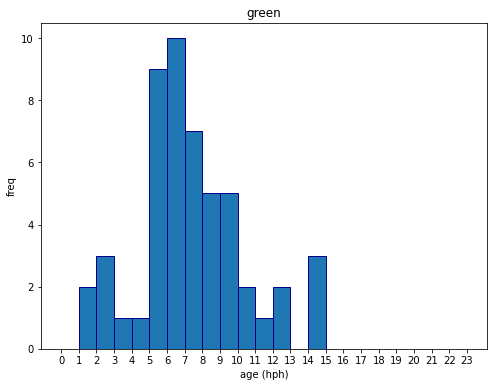

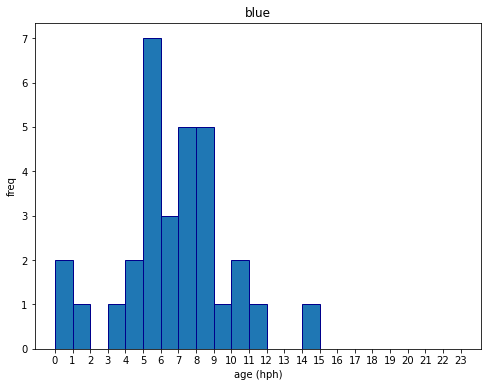

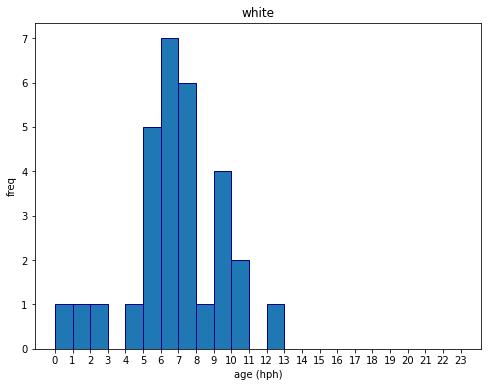

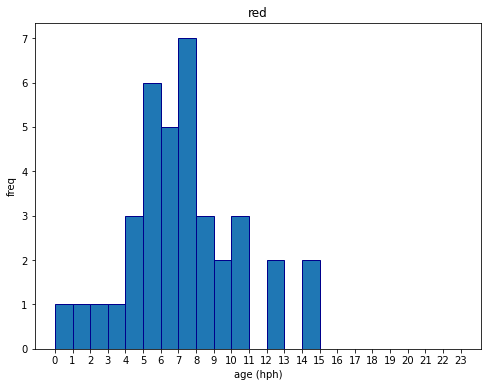

In [164]:
for stim in light["stimuli_name"].unique():
    subset = light[light["stimuli_name"] == stim]
    ages = subset["age"].values
    fig, ax = plt.subplots(figsize = (8,6))
    ax.set_ylabel("freq")
    ax.set_xlabel("age (hph)")
    ax.set_xticks(range(24))
    ax.set_xticklabels(range(24))
    ax.hist(ages, bins = range(24), edgecolor = "darkblue")
    
    ax.set_title(stim)
    fig.savefig(f"./age_hists/{stim}.svg")
    
    

In [165]:
for stim in light["stimuli_name"].unique():
    subset = light[light["stimuli_name"] == stim]
    dates = subset["date"].unique()
    
    print(f"{stim}: {len(dates)}")

green: 11
blue: 8
white: 9
red: 7
